[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/image_IPP.ipynb)

# testing `image_IPP.py`

This notebook runs performs a modification of the file `image_IPP.py` and compare the RD performance.

In [1]:
!ln -sf ~/quantization/deadzone_quantizer.py .
!ln -sf ~/quantization/distortion.py .
!ln -sf ~/quantization/information.py .
!ln -sf ~/quantization/midtread_quantizer.py .

### Prepare the sequence

In [2]:
!rm /tmp/*.png

In [3]:
#sequence = "bus_cif.y4m"
sequence = "akiyo_cif.y4m"

In [4]:
N_frames = 5 # Min val 3

In [5]:
!../sequences/extract_frames.sh -s $sequence -n $N_frames

sequence file name = akiyo_cif.y4m
number of frames to extract = 5
/home/vruiz/MRVC/sequences/akiyo_cif.y4m exists. Only extracting ...
ffmpeg version n4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf -

In [6]:
!sed -z -i 's/\n#temporal_codec = "image_IPP"\n/\ntemporal_codec = "image_IPP"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "image_IPP_adaptive"\n/\n#temporal_codec = "image_IPP_adaptive"\n/g' config.py
!sed -z -i 's/\ntemporal_codec = "MP4"\n/\n#temporal_codec = "MP4"\n/g' config.py

In [7]:
!cat -n config.py | grep "temporal_codec" 

    28	temporal_codec = "image_IPP"
    29	#temporal_codec = "image_IPP_adaptive"
    30	#temporal_codec = "MP4"


In [8]:
!cat -n config.py | grep "transform" 

     6	#multiresolution_transform = "DWT"
     7	#multiresolution_transform = "LP"
     8	multiresolution_transform = None


In [9]:
!cat -n config.py | grep "color" 

    14	color = "YCoCg"
    15	#color = "YCrCb"
    16	#color = "RGB"


In [10]:
!cat -n config.py | grep "spatial_codec" 

    10	#spatial_codec = "Q+PNG"
    11	#spatial_codec = "H264"
    12	spatial_codec = "DCT"


## Option 1
Increase the Q_step for P-frames.

In [11]:
!sed -z -i 's/\n            #return self.E_codec4_DCT(E_k, prefix, k, Q_step \* 2000)\n/\n            return self.E_codec4_DCT(E_k, prefix, k, Q_step \* 2000)\n/g' image_IPP.py
!sed -z -i 's/\n            return self.E_codec4_DCT(E_k, prefix, k, Q_step)\n/\n            #return self.E_codec4_DCT(E_k, prefix, k, Q_step)\n/g' image_IPP.py

In [12]:
!cat -n image_IPP.py | grep "return self.E_codec4_DCT"

   383	            #return self.E_codec4_DCT(E_k, prefix, k, Q_step)
   384	            return self.E_codec4_DCT(E_k, prefix, k, Q_step * 2000)


### Select quantization range

In [13]:
!sed -z -i 's/\nQ_steps = range(42, 21, -3)\n/\n#Q_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/\nQ_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [14]:
!cat -n config.py | grep "Q_steps" 

    22	#Q_steps = range(42, 21, -3)
    25	#Q_steps = [128]
    26	Q_steps = [128, 64, 32, 16, 8]


### Run the codec

In [15]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_1 >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 153 colors in palette
Input IDAT size = 2822 bytes
Input file size = 2879 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708

Output IDAT size = 1708 bytes (1114 bytes decrease)
Output file size = 2236 bytes (643 bytes = 22.33% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Error: Can't back up the existing output file

** Status report
1 file(s) have been

** Processing: /tmp/original_motion_y_diff_comp_003.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_y_diff_comp_003.png is already optimized.

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_diff_comp_004.png
** Processing: /tmp/original_motion_y_diff_comp_004.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_y_diff_comp_004.png is already opti

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=3 Q_step=128000
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_003.png
** Processing: /tmp/original_texture_003.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 685 bytes
Input file size = 742 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 35
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 35
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 35
  zc = 9  zm = 8  zs = 0  f = 5		IDAT size = 35
  zc = 9  zm = 8  zs = 1  f = 5		IDAT size = 35
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 35

Selecting parameters:
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 35

Output IDAT size = 35 bytes (650 bytes decrease)
Output file size = 107 bytes (635 bytes = 85.58% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.38944119215011597 -0.8992840051651001
[image_1.py:44 _write() DEBUG] optipng /tmp/orig

[image_IPP.py:73 encode() DEBUG] W_k 32 -51
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.28335365653038025 -0.25841224193573
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_002.png
** Processing: /tmp/original_motion_x_002.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_x_002.png is already optimized.

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_002.png
** Processing: /tmp/original_motion_y_002.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size

[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 17488 bytes
Input file size = 17569 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 13308
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 13175
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 13175

Output IDAT size = 13175 bytes (4313 bytes decrease)
Output file size = 13232 bytes (4337 bytes = 24.69% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Error: Can't back up the existing output file

** Status report
1 file(s) have 

** Processing: /tmp/original_motion_y_diff_comp_002.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_y_diff_comp_002.png is already optimized.

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_diff_comp_003.png
** Processing: /tmp/original_motion_y_diff_comp_003.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_y_diff_comp_003.png is already opti

[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.2449968159198761 -0.286998450756073
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_003.png
** Processing: /tmp/original_motion_x_003.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_x_003.png is already optimized.

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_003.png
** Processing: /tmp/original_motion_y_003.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT 

In [16]:
!grep BPP /tmp/output_image_IPP_1 | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_1.txt

In [17]:
!cat /tmp/image_IPP_1.txt

0.012421085858585859	232.26812065972223
0.022648358585858584	114.55240425084176
0.041487794612794615	52.31490688131313
0.07075441919191919	24.700929214015154
0.11181607744107744	13.102560106271046


In [18]:
RD_image_IPP_1 = []
with open("/tmp/image_IPP_1.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_1.append((float(rate), float(_distortion)))

## Option 2
All frames use the same Q_step.

In [19]:
!sed -z -i 's/\n            return self.E_codec4_DCT(E_k, prefix, k, Q_step \* 2000)\n/\n            #return self.E_codec4_DCT(E_k, prefix, k, Q_step \* 2000)\n/g' image_IPP.py
!sed -z -i 's/\n            #return self.E_codec4_DCT(E_k, prefix, k, Q_step)\n/\n            return self.E_codec4_DCT(E_k, prefix, k, Q_step)\n/g' image_IPP.py

In [20]:
!cat -n image_IPP.py | grep "return self.E_codec4_DCT"

   383	            return self.E_codec4_DCT(E_k, prefix, k, Q_step)
   384	            #return self.E_codec4_DCT(E_k, prefix, k, Q_step * 2000)


### Select quantization range

In [21]:
!sed -z -i 's/\nQ_steps = range(42, 21, -3)\n/\n#Q_steps = range(42, 21, -3)\n/g' config.py
!sed -z -i 's/\n#Q_steps = \[128, 64, 32, 16, 8\]\n/\nQ_steps = \[128, 64, 32, 16, 8\]\n/g' config.py

In [22]:
!cat -n config.py | grep "Q_steps" 

    22	#Q_steps = range(42, 21, -3)
    25	#Q_steps = [128]
    26	Q_steps = [128, 64, 32, 16, 8]


### Run the codec

In [23]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_2 >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 153 colors in palette
Input IDAT size = 2822 bytes
Input file size = 2879 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 1708

Output IDAT size = 1708 bytes (1114 bytes decrease)
Output file size = 2236 bytes (643 bytes = 22.33% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Error: Can't back up the existing output file

** Status report
1 file(s) have been

[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 5462 bytes
Input file size = 5519 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 4211
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 4204
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 4204

Output IDAT size = 4204 bytes (1258 bytes decrease)
Output file size = 4261 bytes (1258 bytes = 22.79% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.622368335723877 -0.34482088685035706
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_001.png
** Processing: /tmp/original_motion_x_001.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Error: Can't back up the existing output file

** Status report
1 file(s) have been pr

** Processing: /tmp/original_motion_x_diff_comp_004.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_x_diff_comp_004.png is already optimized.

[image_IPP.py:204 compute_br_DCT() DEBUG] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:210 compute_br_DCT() INFO] motion (X direction): 93 bytes, 4.464 KBPS, 0.0004892676767676768 BPP
[image_IPP.py:56 encode() INFO] Running ...
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_000.png
** Processing: /tmp/original_texture_000.png
352x288 pixels, 3x8 bits/pixel, RGB
Input IDAT size = 10245 bytes
Input file size = 10314 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDA

[image_IPP.py:118 compute_br_DCT() INFO] height=288 width=352 n_channels=3 sequence_time=0.16666666666666666
[image_IPP.py:127 compute_br_DCT() DEBUG] cat /tmp/original_texture_???.png | gzip -9 > /tmp/image_IPP_texture.gz
[image_IPP.py:133 compute_br_DCT() INFO] texture: 10181 bytes, 488.688 KBPS, 0.05356165824915825 BPP
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_diff_comp_002.png
** Processing: /tmp/original_motion_y_diff_comp_002.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_y_diff_comp_002.png is already optimized.

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_diff_comp_003.png
** Processing: /tmp/original_motion_y_diff_comp_003.

[image_IPP.py:73 encode() DEBUG] W_k 32 -50
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.2449968159198761 -0.286998450756073
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_003.png
** Processing: /tmp/original_motion_x_003.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 3  f = 0		IDAT size = 11
  zc = 9  zm = 8  zs = 3  f = 5		IDAT size = 11

/tmp/original_motion_x_003.png is already optimized.

[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_y_003.png
** Processing: /tmp/original_motion_y_003.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 76 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 12
  zc = 9  zm = 8  zs = 1  f = 0		IDAT size

[image_IPP.py:387 E_codec4_DCT() INFO] prefix=/tmp/original_texture_ k=1 Q_step=8
[image_3.py:51 _write() DEBUG] optipng /tmp/original_texture_001.png
** Processing: /tmp/original_texture_001.png
352x288 pixels, 3x8 bits/pixel, RGB
Reducing image to 8 bits/pixel, 54 colors in palette
Input IDAT size = 6969 bytes
Input file size = 7026 bytes

Trying:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 3945
                               
Selecting parameters:
  zc = 9  zm = 8  zs = 0  f = 0		IDAT size = 3945

Output IDAT size = 3945 bytes (3024 bytes decrease)
Output file size = 4176 bytes (2850 bytes = 40.56% decrease)

[image_IPP.py:73 encode() DEBUG] W_k 32 -51
[image_IPP.py:75 encode() DEBUG] COMPUTED flow 0.28335365653038025 -0.25841224193573
[image_1.py:44 _write() DEBUG] optipng /tmp/original_motion_x_002.png
** Processing: /tmp/original_motion_x_002.png
22x18 pixels, 8 bits/pixel, grayscale
Reducing image to 1 bit/pixel, 1 color in palette
Input IDAT size = 19 bytes
Input file size = 7

     1	Q_step: 128 BPP: 0.014683291245791246 KBPS: 133.968 Average AMSE: 227.55217671506733
     2	Q_step: 64 BPP: 0.02793560606060606 KBPS: 254.88 Average AMSE: 109.69377761994949
     3	Q_step: 32 BPP: 0.054540193602693604 KBPS: 497.616 Average AMSE: 47.69973826809764
     4	Q_step: 16 BPP: 0.10016308922558922 KBPS: 913.872 Average AMSE: 20.685074705387205
     5	Q_step: 8 BPP: 0.1861847643097643 KBPS: 1698.72 Average AMSE: 10.122535905934345


In [24]:
!grep BPP /tmp/output_image_IPP_2 | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_2.txt

In [25]:
!cat /tmp/image_IPP_2.txt

0.014683291245791246	227.55217671506733
0.02793560606060606	109.69377761994949
0.054540193602693604	47.69973826809764
0.10016308922558922	20.685074705387205
0.1861847643097643	10.122535905934345


In [26]:
RD_image_IPP_2 = []
with open("/tmp/image_IPP_2.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_2.append((float(rate), float(_distortion)))

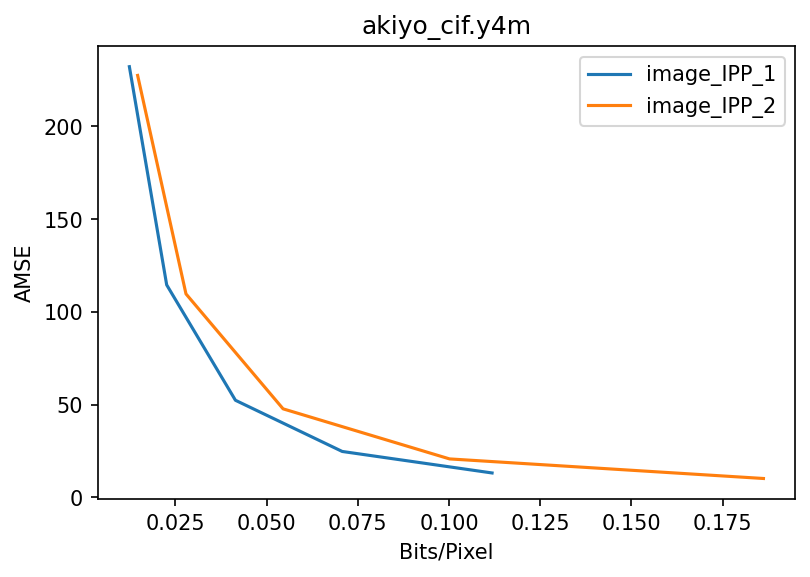

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP_1), label="image_IPP_1")
pylab.plot(*zip(*RD_image_IPP_2), label="image_IPP_2")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()